# [팬더스(Pandas)](https://pandas.pydata.org/pandas-docs/stable/index.html#)


팬더스(Pandas)라는 이름은 계량경제학의 [PANel DAta](https://en.wikipedia.org/wiki/Panel_data)에서 유래<br>표 형태로 표현될 수 있는 데이터(예: 엑셀, 구글 스프레드시트 등)를 다루기에 편리<br>데이터 분석과 조작에 필요한 기능들을 가지고 있고 다양한 형식의 파일 입출력, 데이터베이스 연동, 그래프 그리기 등의 편의 기능들도 다양하게 발달해 있으며, 속도면에서 엑셀이나 구글 스프레드시트보다 훨씬 빠름

[주요명령어 모음 PDF파일](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


```conda install pandas``` 또는 ```pip install pandas```로 간단히 설치할 수 있습니다.

### [실습] 타이태닉(Titanic) 데이터셋(dataset)

타이태닉 데이터셋은 [여기](https://github.com/pandas-dev/pandas/blob/main/doc/data/titanic.csv)에서 받으실 수 있습니다.

1. 탑승자 중 [로테스 백작부인](https://en.wikipedia.org/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes#:~:text=Lucy%20No%C3%ABl%20Martha%20Leslie%2C%20Countess,of%20the%20rescue%20ship%20Carpathia.)(Noël Leslie, Countess of Rothes)을 찾아서 그 당시 나이("Age")를 확인해보세요. 이름에 "Countess"가 포함(contains)되어 있는지를 보면 됩니다. [API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)
2. 생존자와 사망자의 수를 각각 확인해보세요.
3. 생존자들의 나이로 [히스토그램](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-hist)을 그려보세요.

In [82]:
import pandas as pd
df = pd.read_csv("titanic.csv")
series = df.loc[df["Name"].str.contains("Countess"), ["Name", "Age"]]
print(type(series.Age))
print(series.Age)

<class 'pandas.core.series.Series'>
759    33.0
Name: Age, dtype: float64


In [77]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [83]:
print("탑승자 수 : ", len(df.index))
print("생존자 수 : ", len(df[df["Survived"] == 1].index))
print("사망자 수 : ", len(df[df["Survived"] == 0].index))

탑승자 수 :  891
생존자 수 :  342
사망자 수 :  549


<AxesSubplot:>

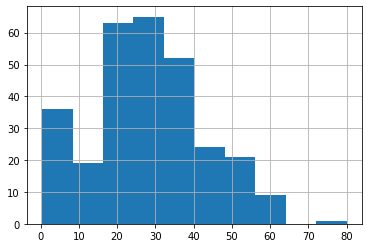

In [84]:
df.loc[df["Survived"] == 1, "Age"].hist()

### [실습] 공기 오염 데이터셋

[파리(Paris), 런던(London), 앤트워프(Antwerpen)의 대기중 이산화질소($NO_2$)의 농도 데이터](https://github.com/pandas-dev/pandas/blob/main/doc/data/air_quality_no2_long.csv)를 가시화해봅시다.


In [38]:
import pandas as pd
df = pd.read_csv("대기질.csv")

In [53]:
df2 = df.drop('date.utc', axis=1)
df2

,city,country,location,parameter,value,unit
0,Paris,FR,FR04014,no2,20.0,µg/m³
1,Paris,FR,FR04014,no2,21.8,µg/m³
2,Paris,FR,FR04014,no2,26.5,µg/m³
3,Paris,FR,FR04014,no2,24.9,µg/m³
4,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2063,London,GB,London Westminster,no2,26.0,µg/m³
2064,London,GB,London Westminster,no2,16.0,µg/m³
2065,London,GB,London Westminster,no2,19.0,µg/m³
2066,London,GB,London Westminster,no2,19.0,µg/m³


In [40]:
# 데이터 읽어오기 날짜 문자열을 날짜 포멧으로 변경
import datetime

In [54]:
df['date.utc']

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: date.utc, Length: 2068, dtype: datetime64[ns, UTC]

In [55]:
df['date.utc'] = pd.to_datetime(df['date.utc'])
df['date.utc']

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: date.utc, Length: 2068, dtype: datetime64[ns, UTC]

In [57]:
air_date=df['date.utc'].dt.strftime('%Y/%m/%d')
air_date

0       2019/06/21
1       2019/06/20
2       2019/06/20
3       2019/06/20
4       2019/06/20
           ...    
2063    2019/05/07
2064    2019/05/07
2065    2019/05/07
2066    2019/05/07
2067    2019/05/07
Name: date.utc, Length: 2068, dtype: object

In [61]:
df3=pd.concat([df2, air_date], axis=1)
df3

,city,country,location,parameter,value,unit,date.utc
0,Paris,FR,FR04014,no2,20.0,µg/m³,2019/06/21
1,Paris,FR,FR04014,no2,21.8,µg/m³,2019/06/20
2,Paris,FR,FR04014,no2,26.5,µg/m³,2019/06/20
3,Paris,FR,FR04014,no2,24.9,µg/m³,2019/06/20
4,Paris,FR,FR04014,no2,21.4,µg/m³,2019/06/20
...,...,...,...,...,...,...,...
2063,London,GB,London Westminster,no2,26.0,µg/m³,2019/05/07
2064,London,GB,London Westminster,no2,16.0,µg/m³,2019/05/07
2065,London,GB,London Westminster,no2,19.0,µg/m³,2019/05/07
2066,London,GB,London Westminster,no2,19.0,µg/m³,2019/05/07


In [62]:
# 앞부분 5개만 출력
df3.head(5)

,city,country,location,parameter,value,unit,date.utc
0,Paris,FR,FR04014,no2,20.0,µg/m³,2019/06/21
1,Paris,FR,FR04014,no2,21.8,µg/m³,2019/06/20
2,Paris,FR,FR04014,no2,26.5,µg/m³,2019/06/20
3,Paris,FR,FR04014,no2,24.9,µg/m³,2019/06/20
4,Paris,FR,FR04014,no2,21.4,µg/m³,2019/06/20


In [66]:
# 필요없는 칼럼 제거
df4 = df3.drop(['country', 'parameter', 'location', 'unit'], axis=1)
df4

,city,value,date.utc
0,Paris,20.0,2019/06/21
1,Paris,21.8,2019/06/20
2,Paris,26.5,2019/06/20
3,Paris,24.9,2019/06/20
4,Paris,21.4,2019/06/20
...,...,...,...
2063,London,26.0,2019/05/07
2064,London,16.0,2019/05/07
2065,London,19.0,2019/05/07
2066,London,19.0,2019/05/07


In [71]:
# 피벗형태로 변경
pd_pivo = pd.pivot_table(df4,
                     index = 'date.utc',
                     columns = 'city',
                     values = 'value')

In [72]:
pd_pivo

city,Antwerpen,London,Paris
date.utc,,,
2019/05/07,47.75000,22.190476,33.986957
2019/05/08,21.75000,26.521739,25.012500
2019/05/09,20.25000,44.652174,27.795833
2019/05/10,11.00000,33.458333,32.854167
2019/05/11,23.75000,31.157895,26.804762
2019/05/12,18.75000,27.708333,18.108333
2019/05/13,14.50000,29.000000,21.662500
2019/05/14,13.00000,28.208333,22.804167
2019/05/15,24.00000,31.260870,20.800000


In [73]:
pd_pivo.dropna()

city,Antwerpen,London,Paris
date.utc,,,
2019/05/07,47.75000,22.190476,33.986957
2019/05/08,21.75000,26.521739,25.012500
2019/05/09,20.25000,44.652174,27.795833
2019/05/10,11.00000,33.458333,32.854167
2019/05/11,23.75000,31.157895,26.804762
2019/05/12,18.75000,27.708333,18.108333
2019/05/13,14.50000,29.000000,21.662500
2019/05/14,13.00000,28.208333,22.804167
2019/05/15,24.00000,31.260870,20.800000
